In [1]:
# basic
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
# plot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#df = pd.read_csv('../../outputs/classification/edges/metrics/cross_validation.csv')
df = pd.read_csv('../../outputs/classification/edges/exp_ii/metrics/cross_validation.csv')
df['model_name'] = df['model'].apply(lambda x: x.split('_')[0])
df.head()

,model,accuracy,mcc,precision,recall,tn,fp,fn,tp,f1,fold,model_name
0,gat_1,0.50,0.02,1.00,0.00,841,0,840,1,0.00,1,gat
1,cheb_1,0.50,0.02,0.50,0.98,18,823,13,828,0.66,1,cheb
2,gcn_1,0.50,0.00,0.00,0.00,841,0,841,0,0.00,1,gcn
3,sage_1,0.50,0.00,0.00,0.00,841,0,841,0,0.00,1,sage
4,gat_2,0.50,0.00,0.50,0.00,840,1,840,1,0.00,2,gat


In [4]:
df.query(" model_name == 'cheb' ")

,model,accuracy,mcc,precision,recall,tn,fp,fn,tp,f1,fold,model_name
1,cheb_1,0.50,0.02,0.50,0.98,18,823,13,828,0.66,1,cheb
5,cheb_2,0.51,0.06,0.50,0.99,26,815,11,830,0.67,2,cheb
9,cheb_3,0.50,-0.03,0.50,0.98,14,827,20,821,0.66,3,cheb
13,cheb_4,0.50,0.00,0.50,1.00,0,841,0,841,0.67,4,cheb
17,cheb_5,0.50,0.00,0.50,1.00,0,841,0,841,0.67,5,cheb
21,cheb_6,0.52,0.10,0.51,0.97,30,390,11,409,0.67,6,cheb
25,cheb_7,0.50,0.03,0.50,0.98,10,410,7,413,0.66,7,cheb
29,cheb_8,0.50,0.00,0.00,0.00,420,0,420,0,0.00,8,cheb
33,cheb_9,0.50,0.00,0.50,1.00,0,420,0,420,0.67,9,cheb
37,cheb_10,0.54,0.09,0.53,0.80,118,302,86,334,0.63,10,cheb


In [5]:
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='mean').reset_index()

,model_name,accuracy,f1,mcc,precision,recall
0,cheb,0.51,0.60,0.03,0.45,0.87
1,gat,0.50,0.14,0.00,0.39,0.20
2,gcn,0.50,0.33,0.01,0.45,0.50
3,sage,0.50,0.20,0.01,0.31,0.30


In [6]:
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='std').reset_index()

,model_name,accuracy,f1,mcc,precision,recall
0,cheb,0.01,0.21,0.04,0.16,0.31
1,gat,0.00,0.28,0.02,0.39,0.42
2,gcn,0.00,0.35,0.02,0.37,0.52
3,sage,0.00,0.32,0.01,0.36,0.48


In [7]:
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='mean').reset_index().round(2).to_csv('mean_bc_vm_edge.csv', index=False)

In [8]:
df_model_cm = df.pivot_table(index=['model_name'], values=['tn', 'fp', 'fn', 'tp'], aggfunc='sum').reset_index()
df_model_cm

,model_name,fn,fp,tn,tp
0,cheb,568,5669,636,5737
1,gat,5456,848,5457,849
2,gcn,3367,2928,3377,2938
3,sage,4614,1686,4619,1691


In [9]:
idx=3
cm = df_model_cm[['tn', 'fp', 'fn', 'tp']].iloc[idx].to_numpy().reshape(2,2)
name = df_model_cm.model_name.iloc[idx]

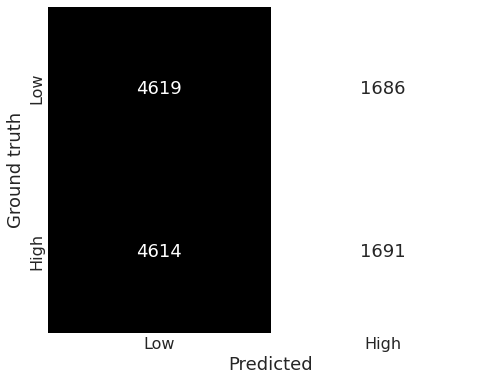

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Greys', 
            xticklabels=['Low', 'High'],
            yticklabels=['Low', 'High'],
            cbar=False, 
            annot_kws={"size": 18})

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Ground truth', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'cm_nd_{name}.png', dpi=600, bbox_inches='tight')
plt.show()